In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os
import csv
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


In [62]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')
target = df["target"]
data = df.drop("target", axis=1)
data.drop_duplicates(inplace = True)
feature_names = data.columns
data.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [63]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


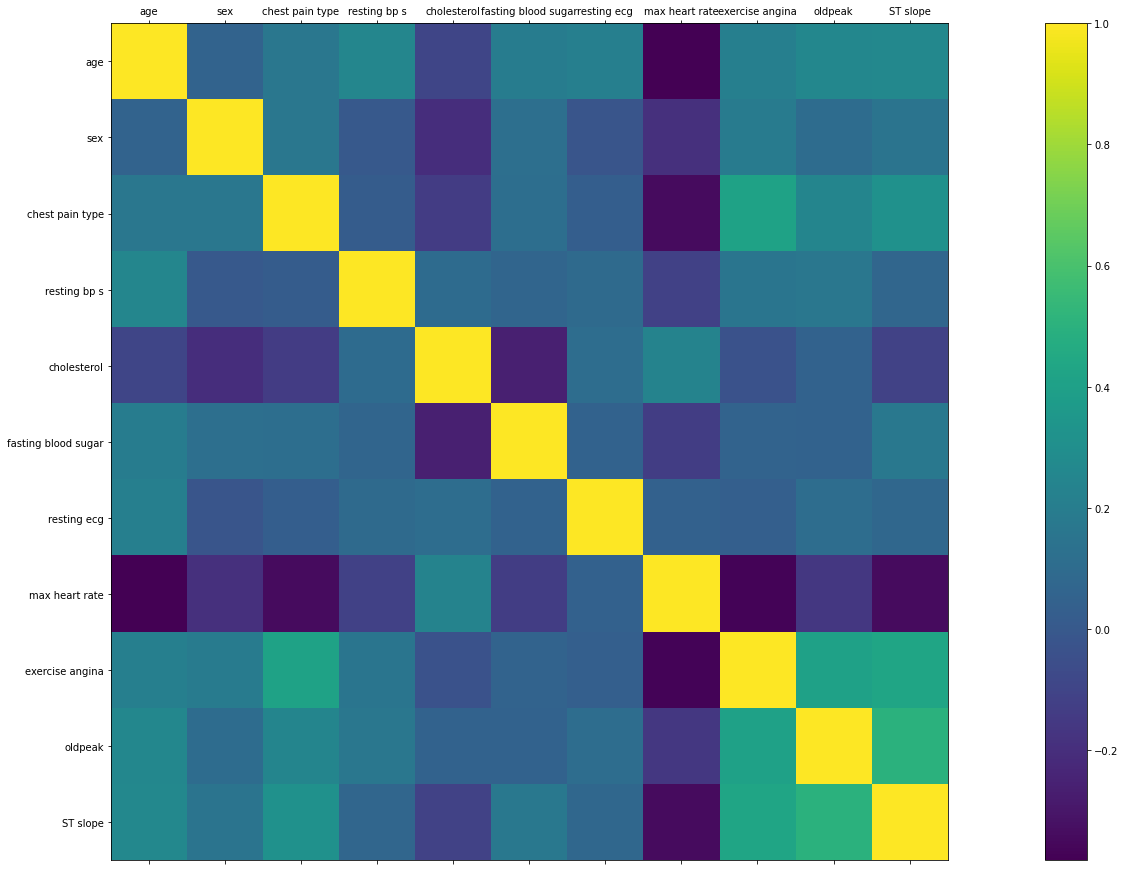

In [117]:
rcParams['figure.figsize'] = 20, 20
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(35, 15)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest pain type'}>],
       [<AxesSubplot:title={'center':'resting bp s'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>],
       [<AxesSubplot:title={'center':'resting ecg'}>,
        <AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ST slope'}>, <AxesSubplot:>]],
      dtype=object)

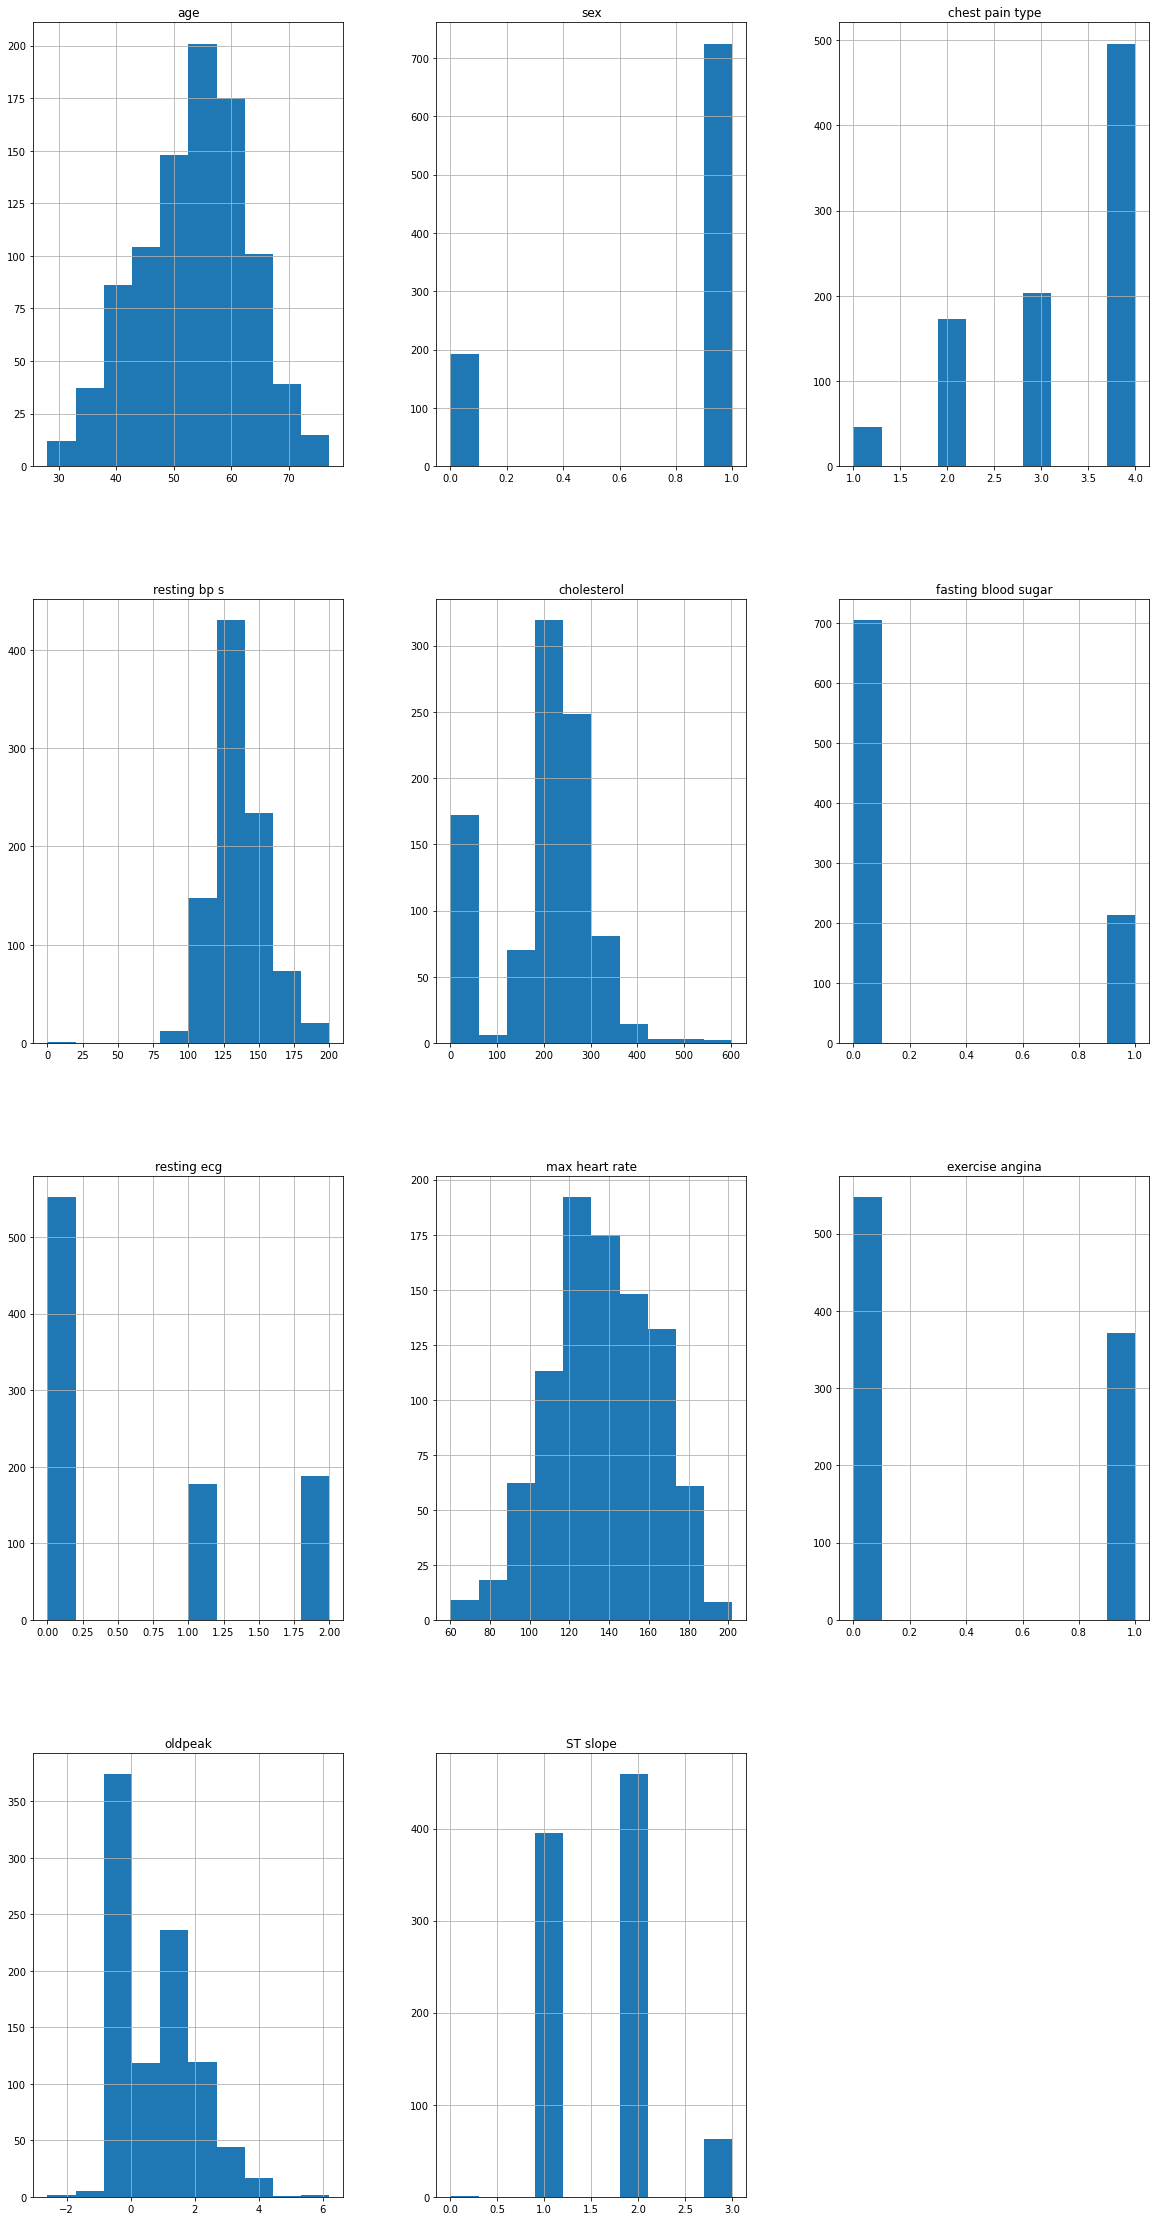

In [65]:
data.hist()

Text(0.5, 1.0, 'Count of Age Class')

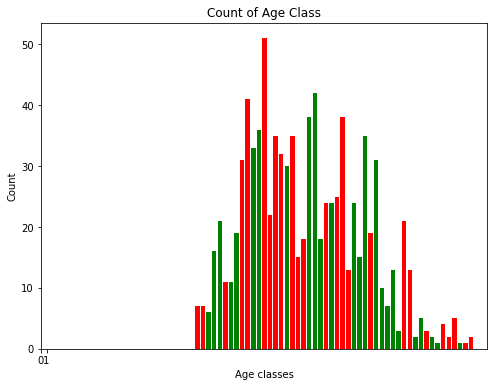

In [66]:
rcParams['figure.figsize'] = 8,6
plt.bar(data['age'].unique(), data['age'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Age classes')
plt.ylabel('Count')
plt.title('Count of Age Class')

In [67]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
from sklearn.preprocessing import StandardScaler as standardscaler
StandardScaler = standardscaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [70]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

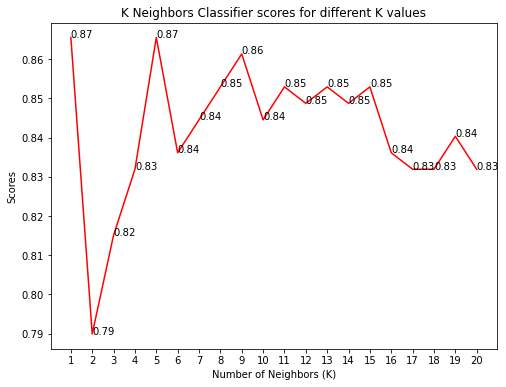

In [71]:

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], round(knn_scores[i-1], 2))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [72]:
# SVM Model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 1)
classifier.fit(X_train, y_train)

SVC(gamma=1, random_state=0)

In [73]:
y_predict = classifier.predict(X_test)

In [74]:
# color = ["black" if c == 0 else "lightgrey" for c in classifier]
# plt.scatter(X_train[:,0], X_train[:,1])
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.9915966386554622
Accuracy for test set for svm = 0.8613445378151261


In [75]:
# Naive Bayes
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.preprocessing import StandardScaler as standardscaler
StandardScaler = standardscaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [78]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model = classifier.fit(X_train, y_train)

In [79]:
y_predict = classifier.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Naive Bayes = 0.8403361344537815
Accuracy for test set for Naive Bayes = 0.8529411764705882


In [81]:
# Logistic Regression
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
StandardScaler = standardscaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [84]:
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")

In [85]:
LR_model = logistic_regression.fit(X_train, y_train)

In [86]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8403361344537815
Accuracy for test set for Logistic Regression = 0.8529411764705882


In [87]:
# Decision Tree
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
y_predict = classifier.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision tree = 1.0
Accuracy for test set for Decision tree = 0.8697478991596639


In [92]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree


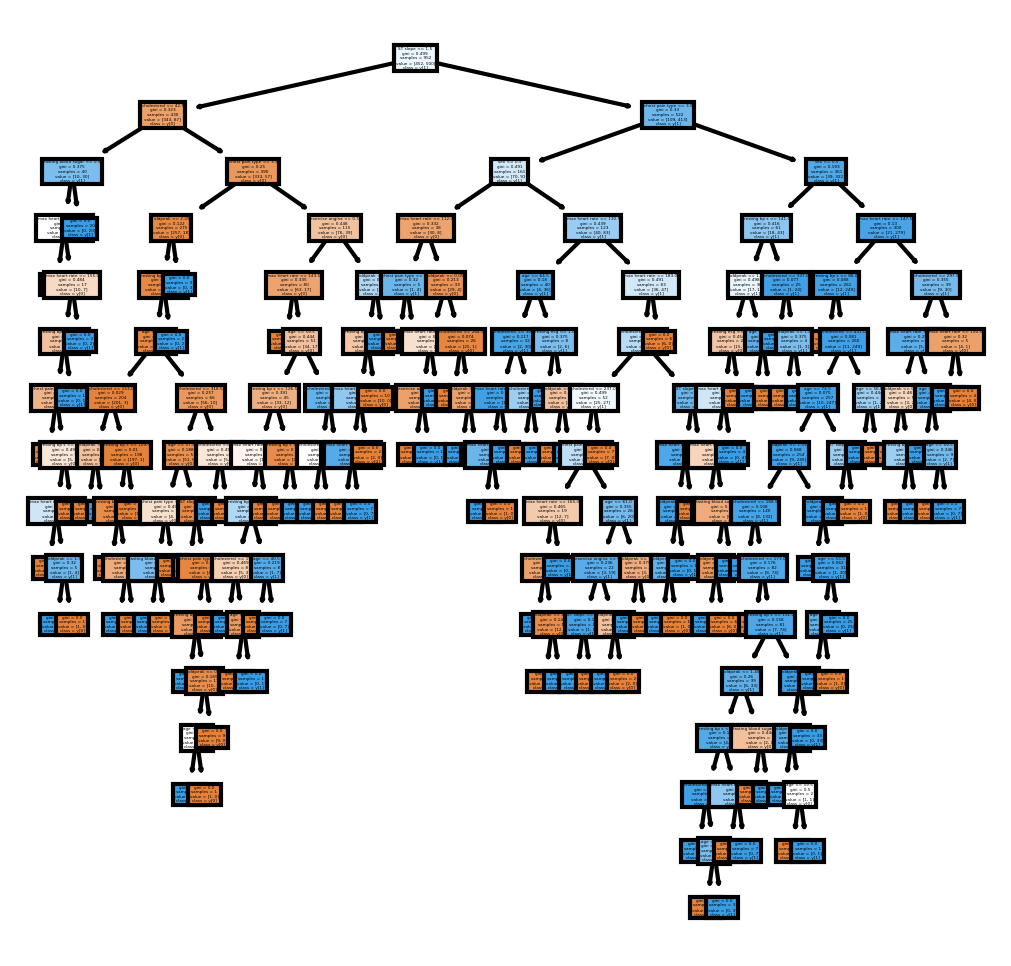

In [93]:
fig, axes = plt.subplots(nrows =1, ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(classifier,
              feature_names=feature_names,
              class_names=True,
              filled = True);

fig.savefig("decision_tree.png")

# dot_data = tree.export_graphviz(classifier,
#                                out_file=None,
#                                feature_names=feature_names,
#                                class_names=True)

In [94]:
# graph = pydotplus.graph_from_dot_data(dot_data)

In [95]:
# Image(graph.create_png())

In [96]:
# Random Forest
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [98]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
classifier = RandomForestClassifier(criterion="entropy", n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [99]:
y_pred = classifier.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.9947478991596639
Accuracy for test set for Random Forest = 0.8697478991596639


In [101]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train[i] for i in indices]
plt.figure()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

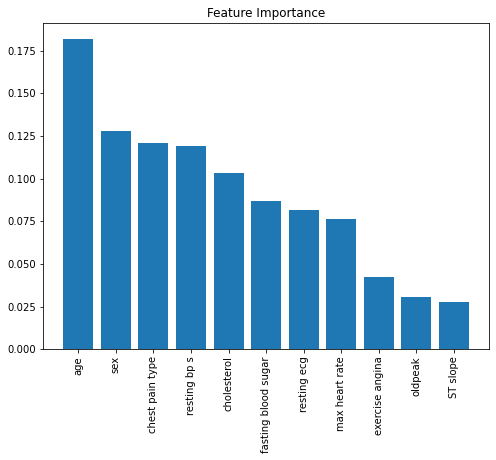

In [102]:
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(feature_names, rotation=90)
# tickvalues = classifier.index
tickvalues = range(0,len(feature_names))
plt.xticks(ticks = tickvalues ,labels = feature_names, rotation = 'vertical')
plt.show()